# Ch09 卷積神經網路的實作案例
## 實作案例 : 辦識 Cifar-10 資料集的彩色圖片
### 9-1-1 認識 Cifar-10 彩色圖片資料集 

https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
from keras.datasets import cifar10

(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

In [4]:
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("X_test.shape: ", Y_test.shape)


X_train.shape:  (50000, 32, 32, 3)
Y_train.shape:  (50000, 1)
X_test.shape:  (10000, 32, 32, 3)
X_test.shape:  (10000, 1)


In [5]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
print(Y_train[0])

[6]


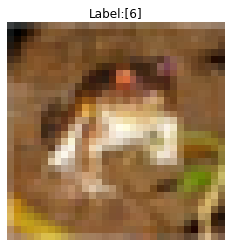

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.title("Label:" + str(Y_train[0]))
plt.axis("off")

plt.show()

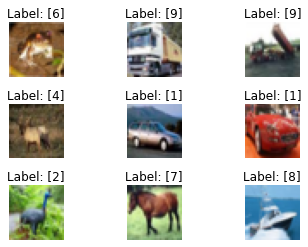

In [9]:
sub_plot = 330 # 3列3行第1個圖

for i in range(0,9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: "+str(Y_train[i]))
    ax.axis("off")
    
plt.subplots_adjust(hspace = .5)

plt.show()

### 9-1-2 使用 CNN 辨識 Cifar-10 圖片

* 使用 Google 的 Colab

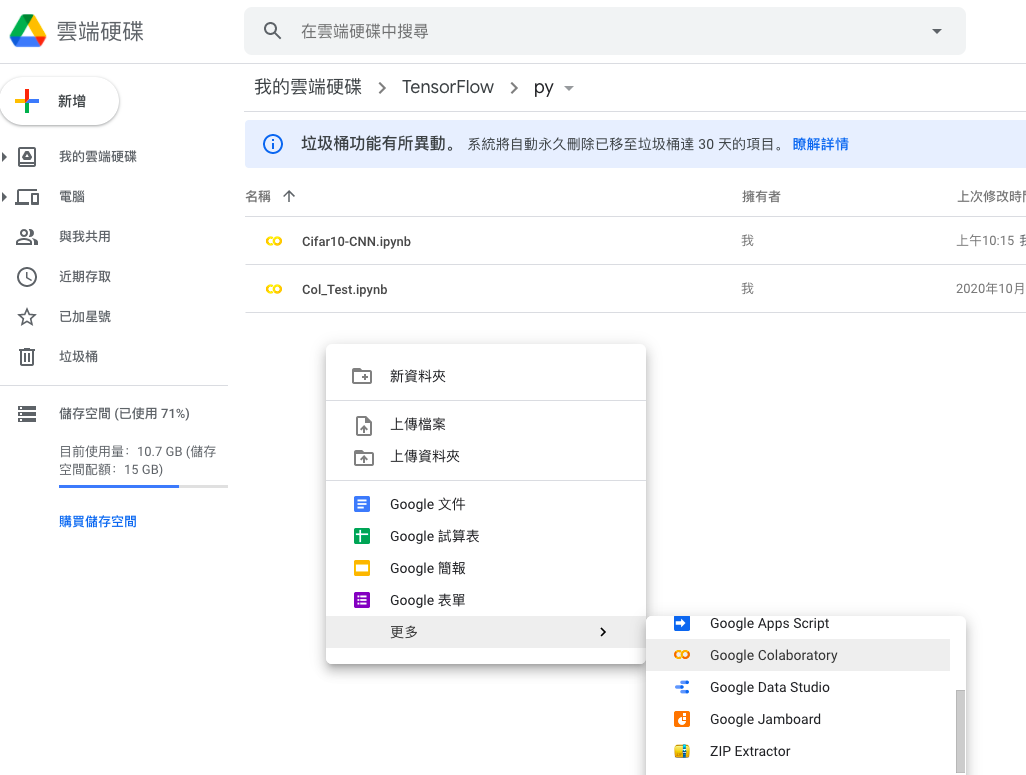

* 選擇用GPU , 編輯 --> 筆記本設定 --> GPU

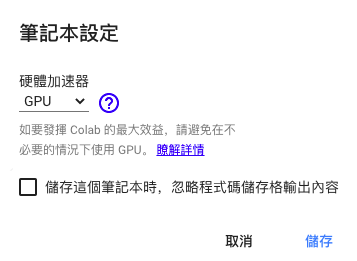

* 顯示行號 , 工具 --> 設定 --> 顯示行號

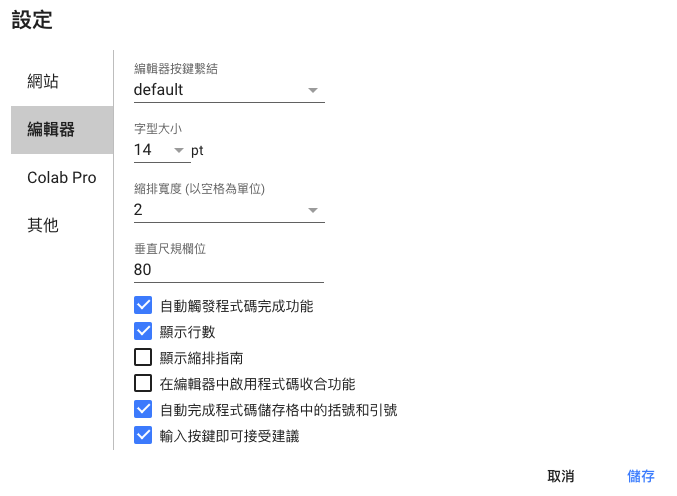

In [31]:
# Ch9_1_2.py

import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense # MLP
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

seed = 10
np.random.seed(seed)
# 載入資料, 正規化 , 分特徵資料與標籤資料
(X_train, Y_train),(X_test, Y_test) = cifar10.load_data()

# 將色彩值從 0~255 轉換成 0~1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") /255

# 將標籤做One-hot Encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 定義模型
model = Sequential()
model.add(Conv2D(32, 
                 kernel_size=(3, 3),
                 padding="same", # 變成一樣的大小
                 input_shape=X_train.shape[1:], 
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [32]:
# 編譯模型
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [33]:
# 訓練模型
history = model.fit(X_train,
                    Y_train,
                    validation_split= 0.2,
                    epochs=9,
                    batch_size=128,
                    verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/9
 - 75s - loss: 1.6524 - acc: 0.3943 - val_loss: 1.3198 - val_acc: 0.5321
Epoch 2/9
 - 74s - loss: 1.2795 - acc: 0.5435 - val_loss: 1.1153 - val_acc: 0.6194
Epoch 3/9
 - 74s - loss: 1.1348 - acc: 0.5963 - val_loss: 1.0344 - val_acc: 0.6434
Epoch 4/9
 - 79s - loss: 1.0509 - acc: 0.6253 - val_loss: 0.9782 - val_acc: 0.6661
Epoch 5/9
 - 82s - loss: 0.9854 - acc: 0.6519 - val_loss: 0.9355 - val_acc: 0.6791
Epoch 6/9
 - 76s - loss: 0.9372 - acc: 0.6704 - val_loss: 0.8834 - val_acc: 0.7002
Epoch 7/9
 - 77s - loss: 0.8844 - acc: 0.6898 - val_loss: 0.8642 - val_acc: 0.7023
Epoch 8/9
 - 74s - loss: 0.8513 - acc: 0.6996 - val_loss: 0.8270 - val_acc: 0.7161
Epoch 9/9
 - 75s - loss: 0.8150 - acc: 0.7148 - val_loss: 0.8354 - val_acc: 0.7130


In [34]:
# 評估模型
print("\Training...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("Accuracy of training = {:.2f}".format(accuracy))

print("\Testing...")
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy of testing = {:.2f}".format(accuracy))

\Training...
50000/50000 [==============================] - 26s 516us/step
Accuracy of training = 0.78
\Testing...
10000/10000 [==============================] - 5s 486us/step
Accuracy of testing = 0.71


In [35]:
# 儲存模型
print("Saving Model: cifar10.h5...")
model.save("cifar10.h5")

Saving Model: cifar10.h5...


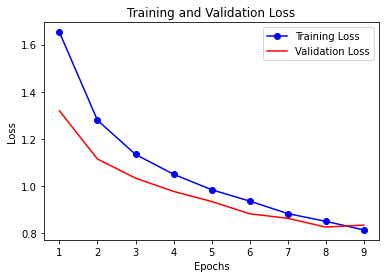

In [36]:
# 繪出訓練和驗證損失的趨勢圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]

plt.plot(epochs,
         loss,
         "bo-",
         label="Training Loss")
plt.plot(epochs,
         val_loss,
         "r",
         label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

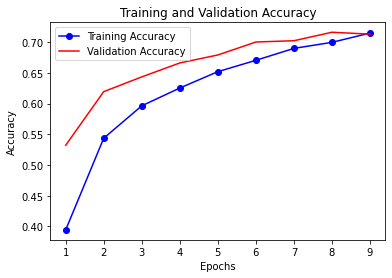

In [37]:
# 繪出訓練和驗證準確度的趨勢圖表
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]

plt.plot(epochs,
         acc,
         "bo-",
         label="Training Accuracy")
plt.plot(epochs,
         val_acc,
         "r",
         label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
 import pandas as pd

 # 載入資料集到新變數, 沒有做過One-hot Encoding
(X_train_bk, Y_train_bk), (X_test_bk, Y_test_bk) = cifar10.load_data()

Y_pred = model.predict_classes(X_test) #  分類
tb = pd.crosstab(Y_test_bk.astype(int).flatten(), # 原始數据
                 Y_pred.astype(int),
                 rownames=["label"],
                 colnames=["predict"])
print(tb)

predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        713   12   89   20   22    7   17   12   75   33
1         12  822   12    9    3    9   25    4   27   77
2         51    2  575   52  117   49  114   25    6    9
3         12    9   94  483   80  152  122   29   11    8
4         16    1   75   48  694   24  101   32    8    1
5          5    1   81  171   66  577   53   37    7    2
6          1    2   33   35   23    7  893    3    3    0
7         10    1   38   37   88   56   16  750    3    1
8         51   35   26   16   13    8   15    3  811   22
9         28   88   11   24    8   10   26   18   28  759


In [39]:
Y_test_2 = Y_test_bk.flatten()
df = pd.DataFrame({"label":Y_test_2, "predict":Y_pred})
df = df[Y_test_2!=Y_pred]
print(df.head(10))

    label  predict
3       0        8
15      8        6
17      7        3
21      0        2
22      4        2
24      5        4
25      2        4
27      0        2
31      5        2
32      4        2


## 9-2 實作案例 : 使用自編碼器去除圖片雜訊

還原不會一致, 像壓縮圖片一樣

### 建立編碼器

In [40]:
# Ch9_2_3.py

import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input


In [41]:
seed = 7
np.random.seed(seed)

(X_train, _),(X_test, _) = mnist.load_data() # _ 表示資料不載入
 

In [42]:
# 轉成向量
X_train = X_train.reshape(X_train.shape[0], 28*28).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28*28).astype("float32")

# 正規化 
X_train = X_train/255
X_test = X_test/255

# Autoencoder
input_img = Input(shape=(784,))
x = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(encoded)
decoded = Dense(784, activation="sigmoid")(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [43]:
# decoder
encoder=Model(input_img,encoded)
decoder_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[-2](decoder_input)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               101136    
Total params: 109,456
Trainable params: 109,456
Non-trainable params: 0
_________________________________________________________________


In [44]:
# 編譯模型
autoencoder.compile(loss="binary_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])

In [45]:
# 訓練模型
autoencoder.fit(X_train,
                X_train,
                validation_data=(X_test, X_test),
                epochs=10,
                batch_size=256,
                shuffle=True,
                verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2225 - acc: 0.7898 - val_loss: 0.1412 - val_acc: 0.8067
Epoch 2/10
 - 7s - loss: 0.1249 - acc: 0.8100 - val_loss: 0.1112 - val_acc: 0.8117
Epoch 3/10
 - 5s - loss: 0.1069 - acc: 0.8127 - val_loss: 0.1009 - val_acc: 0.8124
Epoch 4/10
 - 7s - loss: 0.0995 - acc: 0.8135 - val_loss: 0.0956 - val_acc: 0.8130
Epoch 5/10
 - 7s - loss: 0.0945 - acc: 0.8140 - val_loss: 0.0914 - val_acc: 0.8132
Epoch 6/10
 - 7s - loss: 0.0912 - acc: 0.8143 - val_loss: 0.0886 - val_acc: 0.8134
Epoch 7/10
 - 8s - loss: 0.0888 - acc: 0.8145 - val_loss: 0.0873 - val_acc: 0.8137
Epoch 8/10
 - 7s - loss: 0.0870 - acc: 0.8146 - val_loss: 0.0852 - val_acc: 0.8137
Epoch 9/10
 - 5s - loss: 0.0855 - acc: 0.8147 - val_loss: 0.0840 - val_acc: 0.8138
Epoch 10/10
 - 6s - loss: 0.0842 - acc: 0.8148 - val_loss: 0.0827 - val_acc: 0.8139


In [46]:
# 使用目編碼器來編碼和解碼手寫數字圖片
encoded_imgs = encoder.predict(X_test) #相當於decoded的input層
decoded_imgs = decoder.predict(encoded_imgs)


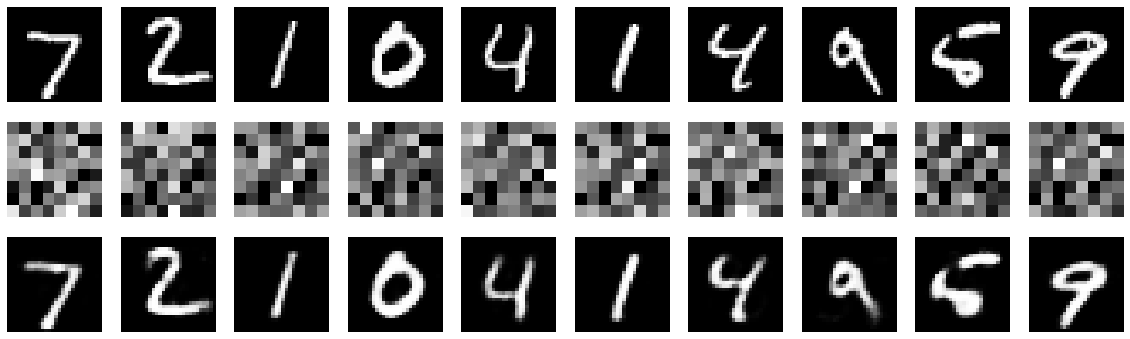

In [47]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,6))
for i in range(n):
  # 原始圖片
  ax = plt.subplot(3, n, i+1)
  ax.imshow(X_test[i].reshape(28,28), cmap="gray")
  ax.axis("off")
  # 壓縮圖片
  ax = plt.subplot(3, n, i+1+n)
  ax.imshow(encoded_imgs[i].reshape(8,8), cmap="gray") # 因為是 64 換算成 8*8
  ax.axis("off")
  # 還原圖片
  ax = plt.subplot(3, n, i+1+2*n)
  ax.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
  ax.axis("off")


plt.show()